** Introduction **

our paper is based on disease prediction using machine learning technique.

first we import all libary, read data by pandas, we visualize our data. like we plot histograms, heatmap, countplot, pairplot, and distplot graph.

we check shape, information or type of data, unique values, describe function we use, check null values in dataset, check and remove outlier in dataset. 

after we define dependent and independent variables then using Scalling to normalize data and split our data for training and testing. 

# First, we importing all the importaant libraries.

In [139]:
# panda used to analyze data
import pandas 
# numpy used to work with array
import numpy as np
# seaborn is visualization libary based on matplotlib 
import seaborn 
# it's a set of functions that work with matlab;it's a library that's used For visualization, graph creationand so on.
#################################
import matplotlib.pyplot as PLT
%matplotlib inline
#################################
# by _S.learn _imports matix
from sklearn import metrics
# by _S.learn import _TAIN_TST_SPILT function and gridsearch, random search.
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
# we impot classification repot, confugion matix and accoracy score, among other things, using the scikit learn package.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,recall_score,precision_score,log_loss 
# we're using scikit learn to impot ROC Curve.
from sklearn.metrics import roc_curve, auc
# warnings are given to devolpers to alert them to circumstances that aren't necessarly exceptions.a warning is usually issued when particular programming pieces such as keyword, functions have become obsolete.
import warnings
warnings.filterwarnings('ignore')
# we import scikit learn library.
import sklearn
# we import sctacking classifier from sklearn.
from sklearn.ensemble import StackingClassifier

# Reading data by Pandas libary

In [140]:
dataset2 = pandas.read_csv('/content/heart (2).csv')

# Data visualizations graphs

<Figure size 1440x720 with 0 Axes>

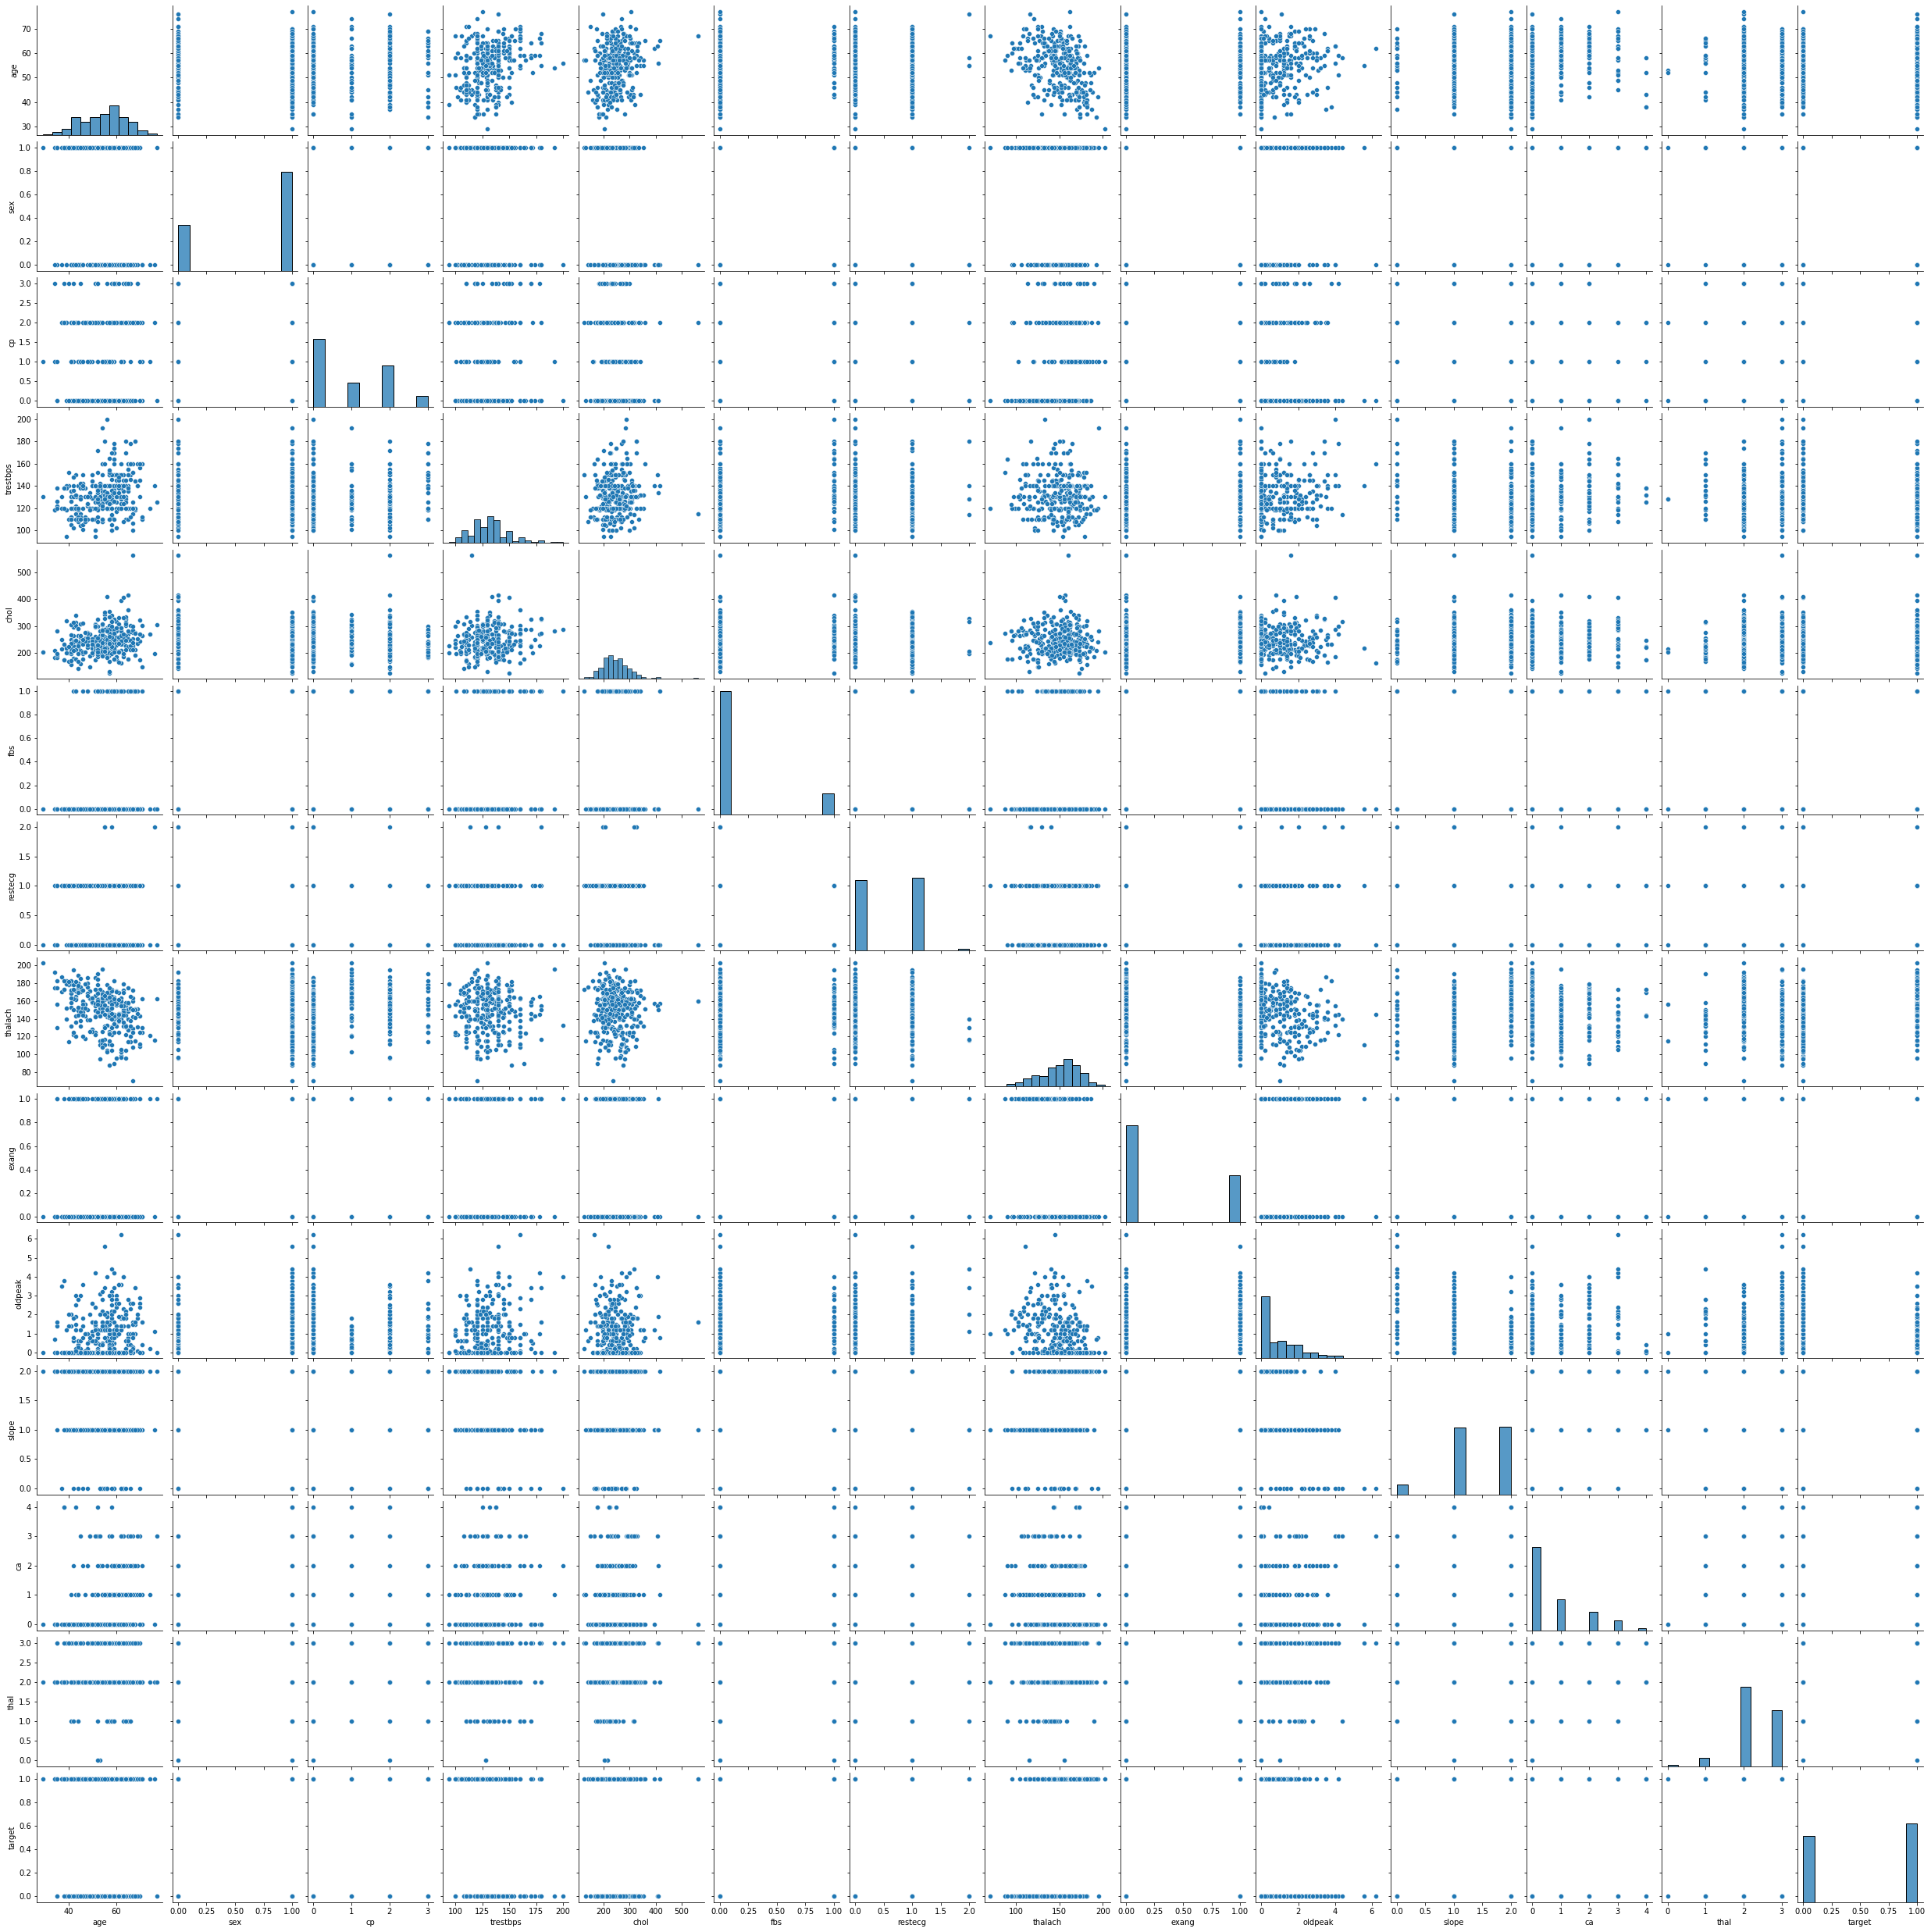

In [141]:
PLT.figure(figsize=(20, 10))                # set the figure size for corelation matrix
seaborn.pairplot(dataset2);                 # showing the corelation matrix b\w the data

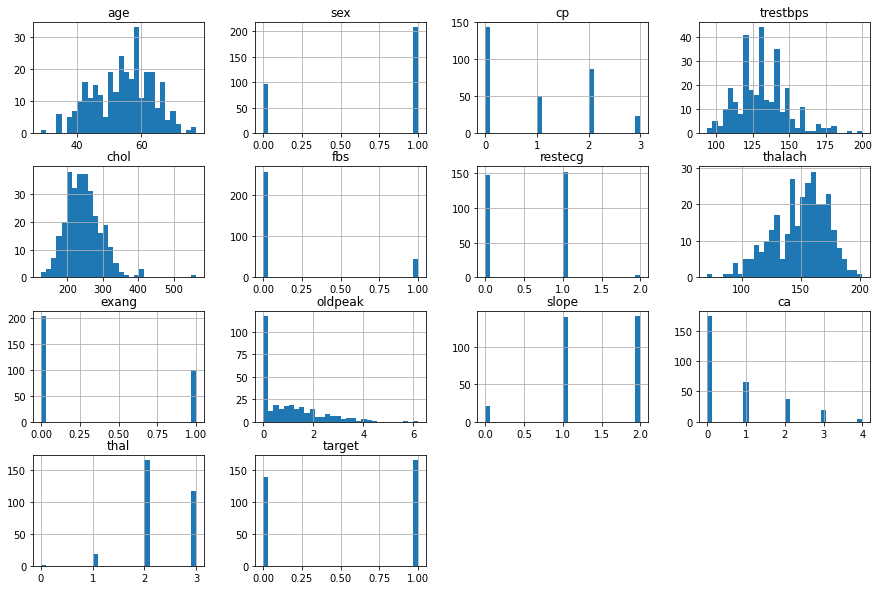

In [142]:
# WE Plotted histograms of my dataset.
dataset2.hist(bins=30, figsize=(15, 10));

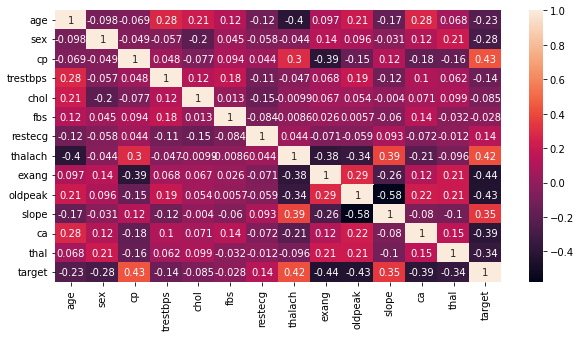

In [143]:
# seaborn heatmap visualizaion for data

# we set figure size && axis of heatmap
fig, ax = PLT.subplots(figsize=(10,5))          
seaborn.heatmap(dataset2.corr(), annot=True);

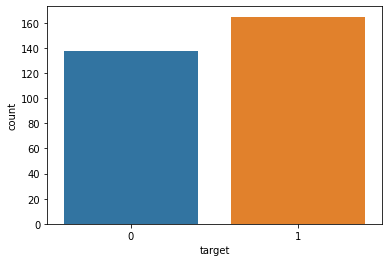

In [144]:
# WE ploted count plot for target column.
seaborn.countplot(x='target',data=dataset2);

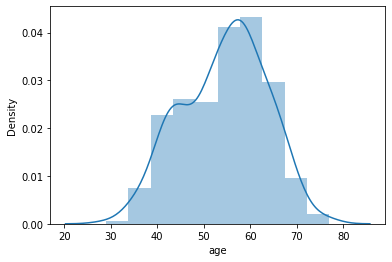

In [145]:
# we show here displot graph of age column of my data.
seaborn.distplot(dataset2['age'], bins=10); 

# Data preprocessing

In [146]:
dataset2.shape  # check the shape of dataset.

(303, 14)

In [147]:
# information check of dataset
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [148]:
dataset2['target'].unique()            # checking the unique values in target column.

array([1, 0])

In [149]:
dataset2['target'].value_counts()    # we count values in column.

1    165
0    138
Name: target, dtype: int64

In [150]:
dataset2.describe().transpose()  # we describe data into dataframe with change of structure.

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [151]:
# checking NULL Values in dataset 
dataset2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

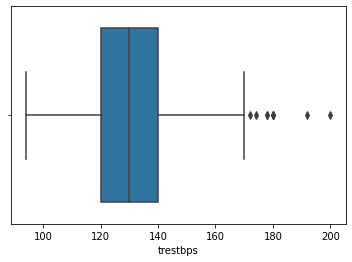

In [152]:
seaborn.boxplot(dataset2['trestbps']);   #we are showing outlier in trestbps column.

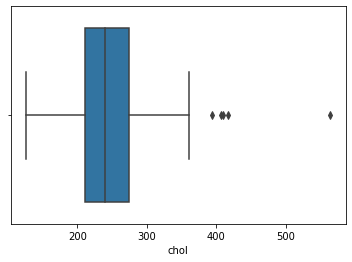

In [153]:
seaborn.boxplot(dataset2['chol']);   #we are showing outlier in oldpeak column.

In [154]:
# we are removing the outlier here in some columns and storing the data in df3 variable.
cols = ['oldpeak','trestbps','chol','fbs','thalach','ca','thal']            

Q2 = dataset2[cols].quantile(0.25)
Q4 = dataset2[cols].quantile(0.75)
IQR = Q4 - Q2

df3 = dataset2[~((dataset2[cols] < (Q2 - 1.5 * IQR)) |(dataset2[cols] > (Q4 + 1.5 * IQR))).any(axis=1)]

# we define Independent &&& Dependent variables

In [155]:
X = df3.drop(['target'], axis=1)
Y= df3['target']

In [156]:
# we are using Sscaler to normalize the data.
from sklearn.preprocessing import StandardScaler 
# define classifier 
std_s = StandardScaler()
# fitted our classifier
std_scaler = std_s.fit_transform(X)

In [157]:
# we spilt our data for taining and tsting using tain tst split function.
X_tain, X_tst, Y_tain, Y_tst = train_test_split(std_scaler, Y, test_size=0.3, random_state=101)  

# XGBOOST Classifier.

In [158]:
# We define variable and set all the parameter.
PARAMS = {'min_child_weight': [1, 5, 10],
          'gamma': [0.5, 1, 1.5],
        'learning_rate' : [0.1, 0.001 , 0.00001],
        'max_depth': [3, 4, 5],
        }

In [159]:
# we use randomized search_cv and pass the parameter.
import xgboost
xg = xgboost.XGBClassifier()
Random_Search = RandomizedSearchCV(xg, param_distributions=PARAMS)

In [160]:
Random_Search.fit(X_tain, Y_tain)     # we fit our define variable with training data.

RandomizedSearchCV(estimator=XGBClassifier(),
                   param_distributions={'gamma': [0.5, 1, 1.5],
                                        'learning_rate': [0.1, 0.001, 1e-05],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10]})

In [161]:
# we are print best parameter here. 
print(Random_Search.best_estimator_)

XGBClassifier(gamma=1.5, max_depth=5, min_child_weight=5)


In [162]:
# we import our XGboost classifier.
from xgboost import XGBClassifier
# initialize the classifier with hyperparameter.
xg = XGBClassifier(gamma=0.5, max_depth=2,min_child_weight=5,learning_rate=0.05)      
# we fit our classifer using training data.
xg.fit(X_tain, Y_tain)

XGBClassifier(gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=5)

In [163]:
# doing prediction of define classifier using test data.
prediction_xgboost = xg.predict(X_tst)

# Testing results for xgboost

In [164]:
# we are showing some results.

# we are print the accuracy for Xgboost classifier.
print('Accuracy of Xgboost = %.4f'% (metrics.accuracy_score(Y_tst, prediction_xgboost)*100)) 
# we print f1 score for Xgboost classifier    
print('f1 Score = %.4f'% (f1_score(Y_tst, prediction_xgboost)*100))                  
# we print precision for Xgboost classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tst, prediction_xgboost)*100)) 
# we print recall for Xgboost classifier using reclaa _score.         
print('Recall = %.4f'% (recall_score(Y_tst, prediction_xgboost)*100)) 


Accuracy1=metrics.accuracy_score(Y_tst, prediction_xgboost)*100
Error1=100-Accuracy1
print('Error rate = %.4f'% Error1) 

Accuracy of Xgboost = 94.2029
f1 Score = 95.1220
Precision = 97.5000
Recall = 92.8571
Error rate = 5.7971


# Training results for xgboost

In [165]:
# doing prediction of define classifier using test data.
prediction_xgboost1 = xg.predict(X_tain)

In [166]:
# we are showing some results.

# we are print the accuracy for Xgboost classifier.
print('Accuracy of Xgboost = %.4f'% (metrics.accuracy_score(Y_tain, prediction_xgboost1)*100)) 
# we print f1 score for Xgboost classifier    
print('f1 Score = %.4f'% (f1_score(Y_tain, prediction_xgboost1)*100))                  
# we print precision for Xgboost classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tain, prediction_xgboost1)*100)) 
# we print recall for Xgboost classifier using reclaa _score.         
print('Recall = %.4f'% (recall_score(Y_tain, prediction_xgboost1)*100)) 

Accuracy of Xgboost = 85.5346
f1 Score = 87.5676
Precision = 85.2632
Recall = 90.0000


In [167]:
# finding classification report for Xgbbost classifier
report_xgboost = classification_report(Y_tst, prediction_xgboost)
print(report_xgboost)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.93      0.95        42

    accuracy                           0.94        69
   macro avg       0.94      0.95      0.94        69
weighted avg       0.94      0.94      0.94        69



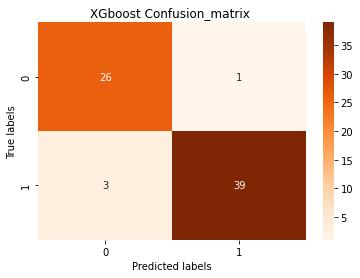

In [168]:
# we define classifier for confugion_matix.
xg1 = confusion_matrix(Y_tst, prediction_xgboost)

# we set parameter for Confusion_matrix.
xg_matrix1 = seaborn.heatmap(xg1, annot=True, cmap='Oranges')           

# we are setting here title for Confugion_matix
xg_matrix1.set_title('XGboost Confusion_matrix ')   
# we are setting x label for Confugion_matix                   
xg_matrix1.set_xlabel('Predicted labels') 
# we are seting y label for Confugion_matix                            
xg_matrix1.set_ylabel('True labels')                                  

PLT.show()       # it is used to show the figure

In [169]:
#sensitivity and specificity for xgboost classifier.
xgboost_sensitivity = xg1[0,0]/(xg1[0,0]+xg1[0,1])
print('Sensitivity : %.4f'% xgboost_sensitivity ) #printing  Sensitivity
xgboost_specificity = xg1[1,1]/(xg1[1,0]+xg1[1,1])
print('Specificity : %.4f'% xgboost_specificity)#printing Specificity

Sensitivity : 0.9630
Specificity : 0.9286


In [170]:
# we print here the log_loss metric for xgboost.
print('log loss metric Xgboost: %.4f'% sklearn.metrics.log_loss(Y_tst, prediction_xgboost))

log loss metric Xgboost: 2.0023


# RandomForest Classifier

In [171]:
# we create a variable and set alll the parameter.
Random_Grid = {'n_estimators': [200, 400, 600],
               'max_features' : ['auto', 'sqrt'],
               'max_depth': [10,20],
               'min_samples_split':[2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [172]:
# we use randomized search and pass all the parameter.
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rf_Random_Search = RandomizedSearchCV(estimator = rfc, param_distributions = Random_Grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# we Fit our define Random Search model.
rf_Random_Search.fit(X_tain, Y_tain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600]},
                   verbose=2)

In [173]:
# we findout best parameter for random search.
rf_Random_Search.best_params_  

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [174]:
# Import our RFC_Classifier
from sklearn.ensemble import RandomForestClassifier 
# we initialize _classifier for random forest. 
rfc = RandomForestClassifier(bootstrap=True,max_depth=10,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=400)  # max_depth=6
# we fitted our _classifier.
rfc.fit(X_tain, Y_tain)

RandomForestClassifier(max_depth=10, n_estimators=400)

In [175]:
# we are Doing prediction for our classfier with testing data.
prediction_random_forest = rfc.predict(X_tst)

# Testing results for random forest.

In [176]:
# we are showing some results.

# we print accuracy for Random forest classifier
print('Accuracy of Random forest = %.4f'% (metrics.accuracy_score(Y_tst, prediction_random_forest)*100)) 
# we print f1 score for Random forest classifier    
print('f1 Score = %.4f'% (f1_score(Y_tst, prediction_random_forest)*100))                  
# we print precision for Random forest classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tst, prediction_random_forest)*100)) 
# we print recall for Random forest classifier using reclaa _score.         
print('Recall = %.4f'% (recall_score(Y_tst, prediction_random_forest)*100)) 


Accuracy2 = metrics.accuracy_score(Y_tst, prediction_random_forest)*100
Error2 = 100-Accuracy2
print('Error rate = %.4f'% Error2) 

Accuracy of Random forest = 91.3043
f1 Score = 92.6829
Precision = 95.0000
Recall = 90.4762
Error rate = 8.6957


# Training results for random forest.

In [177]:
# we are Doing prediction for our classfier with training data.
prediction_random_forest1 = rfc.predict(X_tain)

In [178]:
# we are showing some results.

# we print accuracy for Random forest classifier
print('Accuracy of Random forest = %.4f'% (metrics.accuracy_score(Y_tain, prediction_random_forest1)*100)) 
# we print f1 score for Random forest classifier    
print('f1 Score = %.4f'% (f1_score(Y_tain, prediction_random_forest1)*100))                  
# we print precision for Random forest classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tain, prediction_random_forest1)*100)) 
# we print recall for Random forest classifier using reclaa _score.         
print('Recall = %.4f'% (recall_score(Y_tain, prediction_random_forest1)*100)) 

Accuracy of Random forest = 100.0000
f1 Score = 100.0000
Precision = 100.0000
Recall = 100.0000


In [179]:
# we findout the report for rfc classifier.
report_random_forest = classification_report(Y_tst, prediction_random_forest)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.95      0.90      0.93        42

    accuracy                           0.91        69
   macro avg       0.91      0.92      0.91        69
weighted avg       0.92      0.91      0.91        69



In [180]:
# confusion_matrix visualization by seaborn heatmap for random forest.

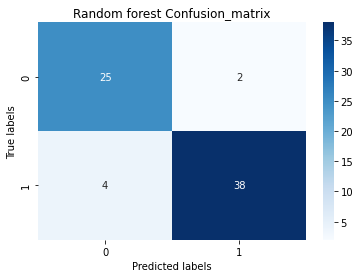

In [181]:
# define classifier for confugion_matrix.
rfc1 = confusion_matrix(Y_tst, prediction_random_forest)

# we set parameter for confugion_matix with varaibles.
rf_matrix = seaborn.heatmap(rfc1, annot=True, cmap='Blues')             

# we set the title for confugion matrix.
rf_matrix.set_title('Random forest Confusion_matrix')   
# we are seting the x axis for confugion matix       
rf_matrix.set_xlabel('Predicted labels')   
# we are seting the y axis for confugion matix                          
rf_matrix.set_ylabel('True labels')                                  

PLT.show()         # plt is used to show the figure

In [182]:
#sensitivity and specificity for random forest classifier.
random_forest_sensitivity = rfc1[0,0]/(rfc1[0,0]+rfc1[0,1])
print('Sensitivity : %.4f'% random_forest_sensitivity ) #printing  Sensitivity
random_forest_specificity = rfc1[1,1]/(rfc1[1,0]+rfc1[1,1])
print('Specificity : %.4f'% random_forest_specificity)#printing Specificity

Sensitivity : 0.9259
Specificity : 0.9048


In [183]:
# we print here the log loss metric for random forest.
print('log loss metric Random forest: %.4f' %sklearn.metrics.log_loss(Y_tst, prediction_random_forest))

log loss metric Random forest: 3.0034


# Extra tree classifier

In [184]:
# we define variable and set all parameters.
param_grid = {
    "random_state": [0],   # [0, 1, 2, 3, 4],
    "n_estimators": [360], # [320, 340, 360, 380, 400],
    "max_depth": [32]      # [25, 30, 32, 34, 38, 45]
}
# we pass here all define parameters.
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
Search_cv = GridSearchCV(etc, scoring='accuracy', param_grid=param_grid)

# we fit classifier with training data.
Search_cv.fit(X_tain, Y_tain)
# we are print best parameter here. 
print(Search_cv.best_estimator_)

ExtraTreesClassifier(max_depth=32, n_estimators=360, random_state=0)


In [185]:
# we are importing extra tree classifier.
from sklearn.ensemble import ExtraTreesClassifier
# we define classifier wwith hyperparameter.
etc = ExtraTreesClassifier(max_depth=32, n_estimators=360, random_state=0)
# we fit our classifier with training data.
etc.fit(X_tain,Y_tain)

ExtraTreesClassifier(max_depth=32, n_estimators=360, random_state=0)

In [186]:
# we predict classifier with testing data.
prediction_etree = etc.predict(X_tst)

# testing results for extra tree.





In [187]:
# we are showing some results.   

 # we print accuracy for extra tree classifier 
print('Accuracy of Extra tree = %.4f'% (metrics.accuracy_score(Y_tst, prediction_etree)*100))
 # we print f1 score for extra tree classifier  
print('f1 Score = %.4f'% (f1_score(Y_tst, prediction_etree)*100))                            
# we print precision for extra tree classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tst, prediction_etree)*100)) 
# we print recall for extra tree classifier using reclal_score.         
print('Recall = %.4f'% (recall_score(Y_tst, prediction_etree)*100))  


Accuracy3=metrics.accuracy_score(Y_tst, prediction_etree)*100
Error3=100-Accuracy3
print('Error rate =', Error3) 

Accuracy of Extra tree = 91.3043
f1 Score = 92.8571
Precision = 92.8571
Recall = 92.8571
Error rate = 8.695652173913047


# Training results for extra tree.

In [188]:
# we predict classifier with training data.
prediction_etree1 = etc.predict(X_tain)

In [189]:
# we are showing some results.   

 # we print accuracy for Xgboost classifier 
print('Accuracy of Extra tree = ', metrics.accuracy_score(Y_tain, prediction_etree1)*100) 
 # we print f1 score for Xgboost classifier  
print('f1 Score = ', f1_score(Y_tain, prediction_etree1)*100)                            
# we print precision for Xgboost classifier using pecision_score.
print('Precision = ', precision_score(Y_tain, prediction_etree1)*100) 
# we print recall for Xgboost classifier using reclaa _score.         
print('Recall = ', recall_score(Y_tain, prediction_etree1)*100)  

Accuracy of Extra tree =  100.0
f1 Score =  100.0
Precision =  100.0
Recall =  100.0


In [190]:
# finding classification report for extra tree classifier
report_Extra_tree = classification_report(Y_tst, prediction_etree)
print(report_Extra_tree)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.93      0.93      0.93        42

    accuracy                           0.91        69
   macro avg       0.91      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69



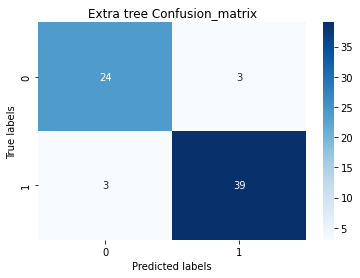

In [191]:
# define classifier for confugion_matix
Etree1 = confusion_matrix(Y_tst, prediction_etree)

# we set parameter for Confusion_matrix
Etree_matrix1 = seaborn.heatmap(Etree1, annot=True, cmap='Blues')            

# we are setting here title for Confugion_matix
Etree_matrix1.set_title('Extra tree Confusion_matrix')   
# we are setting x label for Confugion_matix                   
Etree_matrix1.set_xlabel('Predicted labels') 
# we are seting y label for Confugion_matix                            
Etree_matrix1.set_ylabel('True labels')                                  

PLT.show()      # it is used to show the figure

In [192]:
#sensitivity and specificity for extra tree classifier.
extra_tree_sensitivity = Etree1[0,0]/(Etree1[0,0]+Etree1[0,1])
print('Sensitivity : %.4f'% extra_tree_sensitivity ) #printing  Sensitivity
extra_tree_specificity = Etree1[1,1]/(Etree1[1,0]+Etree1[1,1])
print('Specificity : %.4f'% extra_tree_specificity)#printing Specificity

Sensitivity : 0.8889
Specificity : 0.9286


In [193]:
# we print log loss metric for extra tree classifier.
print('log loss metric Extra tree classifier: %.4f'% sklearn.metrics.log_loss(Y_tst, prediction_etree))

log loss metric Extra tree classifier: 3.0034


# lgbm classifier

In [194]:
# We set variable and store all parameters.
ParaMeter = {'num_leaves':[20,40,60], 'min_child_samples':[5,10,15],
             'max_depth':[-1,5,10],
             'learning_rate':[0.05,0.1,0.2],
             'reg_alpha':[0,0.01,0.03]}

In [195]:
# we use gridsearch and pass all the parameter.
from lightgbm import LGBMClassifier
lg = LGBMClassifier()
lg_grid_search = GridSearchCV(lg,ParaMeter,scoring='accuracy')
# we fit define variable with training data.
lg_grid_search.fit(X_tain, Y_tain)
# we print the best parameter for lgbm classifier.
print(lg_grid_search.best_params_)

{'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 15, 'num_leaves': 20, 'reg_alpha': 0.03}


In [196]:
# we are importing lgbm classifier.
from lightgbm import LGBMClassifier 
# we define classifier with hyperparameter.
lg = LGBMClassifier(learning_rate=0.2,max_depth=1,min_child_samples=15,num_leaves=20, reg_alpha=0.03)
# we fit classifier with training data.
lg.fit(X_tain, Y_tain)

LGBMClassifier(learning_rate=0.2, max_depth=1, min_child_samples=15,
               num_leaves=20, reg_alpha=0.03)

In [197]:
# Doing prediction for our classfier with testing data.
prediction_lgbm = lg.predict(X_tst)

# testing results for lgbm classifier

In [198]:
# we are showing some results.

# we print accuracy for  Lgbm classifier
print('Accuracy of Lgbm classifier = %.4f'% (metrics.accuracy_score(Y_tst, prediction_lgbm)*100)) 
# we print f1 score for Lgbm classifier    
print('f1 Score = %.4f'% (f1_score(Y_tst, prediction_lgbm)*100))                  
# we print precision for Lgbm classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tst, prediction_lgbm)*100)) 
# we print recall for Lgbm classifier using reclaa _score.         
print('Recall = %.4f'% (recall_score(Y_tst, prediction_lgbm)*100)) 


Accuracy4 = metrics.accuracy_score(Y_tst, prediction_lgbm)*100
Error4 = 100-Accuracy4
print('Error rate = %.4f'% Error4) 

Accuracy of Lgbm classifier = 89.8551
f1 Score = 91.3580
Precision = 94.8718
Recall = 88.0952
Error rate = 10.1449


# Training results for lgbm classifier.

In [199]:
# Doing prediction for our classfier with training data.
prediction_lgbm1 = lg.predict(X_tain)

In [200]:
# we are showing some results.

# we print accuracy for  Lgbm classifier
print('Accuracy of Lgbm classifier = %.4f'% (metrics.accuracy_score(Y_tain, prediction_lgbm1)*100)) 
# we print f1 score for Lgbm classifier    
print('f1 Score = %.4f'% (f1_score(Y_tain, prediction_lgbm1)*100))                  
# we print precision for Lgbm classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tain, prediction_lgbm1)*100)) 
# we print recall for Lgbm classifier using reclaa _score.         
print('Recall = %.4f'% (recall_score(Y_tain, prediction_lgbm1)*100)) 

Accuracy of Lgbm classifier = 88.6792
f1 Score = 90.3226
Precision = 87.5000
Recall = 93.3333


In [201]:
# we findout the repot for rfc classifier.
report_lgbm_classifier = classification_report(Y_tst, prediction_lgbm)
print(report_lgbm_classifier)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.95      0.88      0.91        42

    accuracy                           0.90        69
   macro avg       0.89      0.90      0.90        69
weighted avg       0.90      0.90      0.90        69



In [202]:
# confusion_matrix visualization by seaborn heatmap

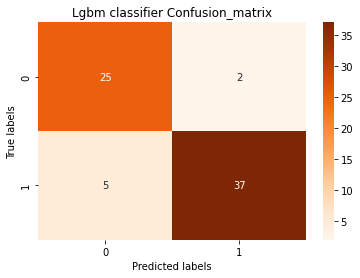

In [203]:
# define classifier for confugion_matix
Confu_matrix_lgbm = confusion_matrix(Y_tst, prediction_lgbm)

# we set all the parameter for confugion_matix,
confusion_matrix_lgbm = seaborn.heatmap(Confu_matrix_lgbm, annot=True, cmap='Oranges')             

# we set the title for confugion matrix.
confusion_matrix_lgbm.set_title('Lgbm classifier Confusion_matrix')   
# we are seting the x axis for confugion matix       
confusion_matrix_lgbm.set_xlabel('Predicted labels')   
# we are seting the y axis for confugion matix                          
confusion_matrix_lgbm.set_ylabel('True labels')                                  

PLT.show()        # it is used to show the figure

In [204]:
#sensitivity and specificity for lgbm classifier.
Lgbm_classifier_sensitivity = Confu_matrix_lgbm[0,0]/(Confu_matrix_lgbm[0,0]+Confu_matrix_lgbm[0,1])
print('Sensitivity : %.4f'% Lgbm_classifier_sensitivity ) #printing  Sensitivity
Lgbm_classifier_specificity = Confu_matrix_lgbm[1,1]/(Confu_matrix_lgbm[1,0]+Confu_matrix_lgbm[1,1])
print('Specificity : %.4f'% Lgbm_classifier_specificity)#printing Specificity

Sensitivity : 0.9259
Specificity : 0.8810


In [205]:
# we print log loss metric for lgbm classifier.
print('log loss metric Lgbm Classifier:%.4f'%(sklearn.metrics.log_loss(Y_tst, prediction_lgbm)))

log loss metric Lgbm Classifier:3.5040


# Stacking classifier

In [206]:
# we are defining all the models one by one.
xgboost =  XGBClassifier()
rfclassifier = RandomForestClassifier()
ex_tree =  ExtraTreesClassifier()
lgbm = LGBMClassifier()
CLF = [('xg',xgboost),('rfc',rfclassifier),('etree',ex_tree),('lg',lgbm)] #we store all variable into new variable.

# we import logistics regresion classifier. 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()# define classifir for logistic regression.
Stacked_Model = StackingClassifier(estimators = CLF, final_estimator = lr)# Pass all element and store into new variable.

In [138]:
# define all variable with parameters.
stacked_params = {'xg__gamma':[1,5],
                  'rfc__n_estimators': [10, 50],
                  'etree__n_estimators': [100,150],
                  'lg__num_leaves': [20, 40,60]  
                  }

# we pass all parameter.
grid = GridSearchCV(estimator=Stacked_Model, param_grid=stacked_params, cv=5)

grid.fit(X_tain, Y_tain)  # we fit variable with training data.

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('xg', XGBClassifier()),
                                                      ('rfc',
                                                       RandomForestClassifier()),
                                                      ('etree',
                                                       ExtraTreesClassifier()),
                                                      ('lg', LGBMClassifier())],
                                          final_estimator=LogisticRegression()),
             param_grid={'etree__n_estimators': [100, 150],
                         'lg__num_leaves': [20, 40, 60],
                         'rfc__n_estimators': [10, 50], 'xg__gamma': [1, 5]})

In [207]:
# we predict staked classifier using testing data.
prediction_staked = grid.predict(X_tst)

# Testing results for stacking classifier

In [208]:
# we are showing some results.

# we print accuracy for  stacked classifier
print('Accuracy of stacked classifier = %.4f'% (metrics.accuracy_score(Y_tst, prediction_staked)*100)) 
# we print f1 score for stacked classifier    
print('f1 Score = %.4f'% (f1_score(Y_tst, prediction_staked)*100))                  
# we print precision for stacked classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tst, prediction_staked)*100)) 
# we print recall for stacked classifier using recall_score.         
print('Recall = %.4f'% (recall_score(Y_tst, prediction_staked)*100)) 

Accuracy5 = metrics.accuracy_score(Y_tst, prediction_staked)*100
Error5 = 100-Accuracy5
print('Error rate = %.4f'% Error5)

Accuracy of stacked classifier = 89.8551
f1 Score = 91.3580
Precision = 94.8718
Recall = 88.0952
Error rate = 10.1449


# Training results for stacking classifier

In [209]:
# we predict staked classifier using testing data.
staked1 = grid.predict(X_tain)

In [210]:
# we are showing some results.

# we print accuracy for  stacked classifier
print('Accuracy of stacked classifier = %.4f'% (metrics.accuracy_score(Y_tain, staked1)*100)) 
# we print f1 score for stacked classifier    
print('f1 Score = %.4f'% (f1_score(Y_tain, staked1)*100))                  
# we print precision for stacked classifier using pecision_score.
print('Precision = %.4f'% (precision_score(Y_tain, staked1)*100)) 
# we print recall for stacked classifier using recall_score.         
print('Recall = %.4f'% (recall_score(Y_tain, staked1)*100)) 

Accuracy of stacked classifier = 100.0000
f1 Score = 100.0000
Precision = 100.0000
Recall = 100.0000


In [211]:
# finding classification_report for stacked classifier.
print(classification_report(Y_tst,prediction_staked))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.95      0.88      0.91        42

    accuracy                           0.90        69
   macro avg       0.89      0.90      0.90        69
weighted avg       0.90      0.90      0.90        69



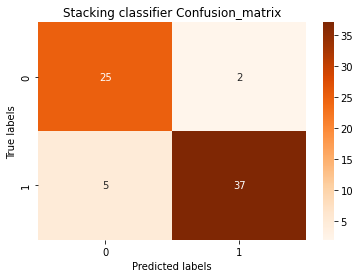

In [212]:
# define classifier for confugion_matix
Confu_matrix_stack = confusion_matrix(Y_tst, prediction_staked)

# we set all the parameter for confugion_matix,
confusion_matrix_stacked = seaborn.heatmap(Confu_matrix_stack, annot=True, cmap='Oranges')             

# we set the title for confugion matrix.
confusion_matrix_stacked.set_title('Stacking classifier Confusion_matrix')   
# we are seting the x axis for confugion matix       
confusion_matrix_stacked.set_xlabel('Predicted labels')   
# we are seting the y axis for confugion matix                          
confusion_matrix_stacked.set_ylabel('True labels')                                  

PLT.show()        # it is used to show the figure

In [213]:
#sensitivity and specificity for lgbm classifier.
stacked_classifier_sensitivity = Confu_matrix_stack[0,0]/(Confu_matrix_stack[0,0]+Confu_matrix_stack[0,1])
print('Sensitivity : %.4f'% stacked_classifier_sensitivity ) #printing  Sensitivity
stacked_classifier_specificity = Confu_matrix_stack[1,1]/(Confu_matrix_stack[1,0]+Confu_matrix_stack[1,1])
print('Specificity : %.4f'% stacked_classifier_specificity)#printing Specificity

Sensitivity : 0.9259
Specificity : 0.8810


In [214]:
# we print log loss metric for stacking classifier.
print('log loss metric stacking Classifier:%.4f'%(sklearn.metrics.log_loss(Y_tst, prediction_staked)))

log loss metric stacking Classifier:3.5040


# Roc curve visualization

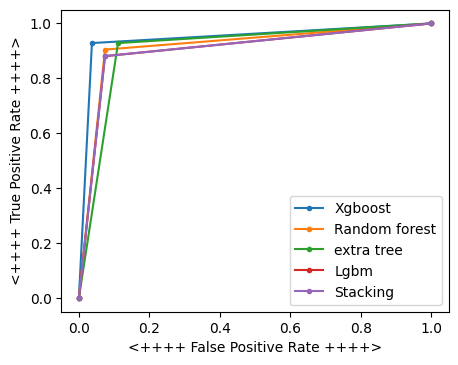

In [215]:
# we are set all the required parameter for R_oc Cur_ve visualization.

# we set classifier for xgboost(1st layer)
fpr1, tpr1, threshold1 = roc_curve(Y_tst,prediction_xgboost) 
# we set classifier for random forest(2nd layer)       
fpr2, tpr2, threshold2 = roc_curve(Y_tst,prediction_random_forest)  
# we set classifier for xgboost(3rd layer)
fpr3, tpr3, threshold3 = roc_curve(Y_tst,prediction_etree) 
# we set classifier for random forest(4th layer)       
fpr4, tpr4, threshold4 = roc_curve(Y_tst,prediction_lgbm) 
# we set classifier for random forest(5th layer)       
fpr5, tpr5, threshold5 = roc_curve(Y_tst,prediction_staked)     


#fixed some para_meter for Visuali_zation the curve
PLT.figure(figsize=(5, 4), dpi=100)     # set figure size for roc curve
# set parameter for Xgboost classifier
PLT.plot(fpr1, tpr1, marker='.', label='Xgboost')      
# set parameter for Random forest           
PLT.plot(fpr2, tpr2, marker='.', label='Random forest')
# set parameter for extra tree classifier
PLT.plot(fpr3, tpr3, marker='.', label='extra tree')      
# set parameter for Lgbm classifier.           
PLT.plot(fpr4, tpr4, marker='.', label='Lgbm')  
# set parameter for stacking classifier.           
PLT.plot(fpr5, tpr5, marker='.', label='Stacking')          

#we set title for x label
PLT.xlabel('<++++ False Positive Rate ++++>')  
# we set title for y label                       
PLT.ylabel('<++++ True Positive Rate ++++>')                          
# plt legend give meaning to visualization.
PLT.legend()
# it is used to show the figure
PLT.show()                                                   

# Bar graph for accuracy comparision.

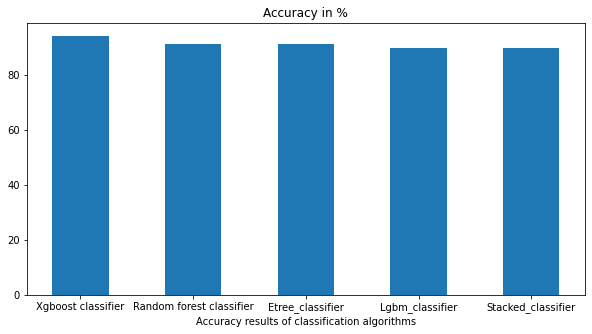

In [216]:
# we are create the data for bar graph.
Data1 = {'Xgboost classifier':Accuracy1, 'Random forest classifier':Accuracy2,'Etree_classifier':Accuracy3,'Lgbm_classifier':Accuracy4,'Stacked_classifier':Accuracy5}
Courses = list(Data1.keys())
Values = list(Data1.values())
  
fig = PLT.figure(figsize = (10, 5))      # we set THE figure size of BAR graph.
 
# Creating the BAR plot
PLT.bar(Courses,Values,width = 0.5)      # passing parameters for bar graph.
 
PLT.xlabel("Accuracy results of classification algorithms")      # we set x axis of bar graph.
PLT.title("Accuracy in %")                                       # we set the title for bar graph. 
PLT.show()                                                       # it is used to show the graph.

# Bar graph(error rate comparision)

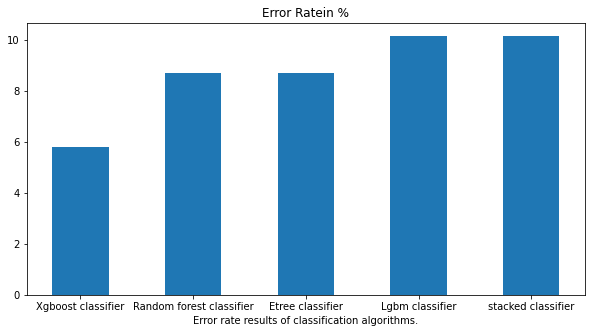

In [217]:
# we are create the data for bar graph.
Data2 = {'Xgboost classifier':Error1, 'Random forest classifier':Error2,'Etree classifier':Error3,'Lgbm classifier':Error4,'stacked classifier':Error5}
Courses1 = list(Data2.keys())
Values1 = list(Data2.values())
  
fig = PLT.figure(figsize = (10, 5))      # we set the figure size of bar graph.
 
# we Create the BAR plot
PLT.bar(Courses1,Values1,width = 0.5)      # passing parameters for bar graph.
 
PLT.xlabel("Error rate results of classification algorithms.")      # we set x axis of bar graph.
PLT.title("Error Ratein %")                                       # we set the title for bar graph. 
PLT.show()                                                       # it is used to show the graph.

*** Conclusion ***

We use 4 algorithms like xgboost, random forest, extra tree and lgbm classifier.

Xgboost classifier = 94.20% (Accuracy)

Random forest classifier = 92.75% (Accuracy)

Extra tree classifier = 91.30% (Accuracy)

Lgbm classifier = 89.85% (Acuuracy)

stacking classifier = 89.85% (Accuracy)

we plot roc curve for all the techniques and bar graphs for accuracy and error rate comparision. 